In [9]:
"""
NeuroFlow AI – Analyse Time To First Value

Objectif :
Mesurer le délai entre l’inscription et la première valeur produit (first_value),
et analyser son impact sur la conversion.
"""

'\nNeuroFlow AI – Analyse Time To First Value\n\nObjectif :\nMesurer le délai entre l’inscription et la première valeur produit (first_value),\net analyser son impact sur la conversion.\n'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
users = pd.read_csv("users.csv")
events = pd.read_csv("events.csv")
subscriptions = pd.read_csv("subscriptions.csv")

In [12]:
users["signup_date"] = pd.to_datetime(users["signup_date"])
events["event_time"] = pd.to_datetime(events["event_time"])

In [13]:
first_value = events[events["event_name"] == "first_value"]

ttfv = first_value.merge(users, on="user_id")

ttfv["days_to_value"] = (
    ttfv["event_time"] - ttfv["signup_date"]
).dt.days

ttfv["days_to_value"].describe()

,days_to_value
count,1738.000000
mean,8.769275
std,4.262979
min,0.000000
25%,5.000000
50%,9.000000
75%,12.000000
max,18.000000


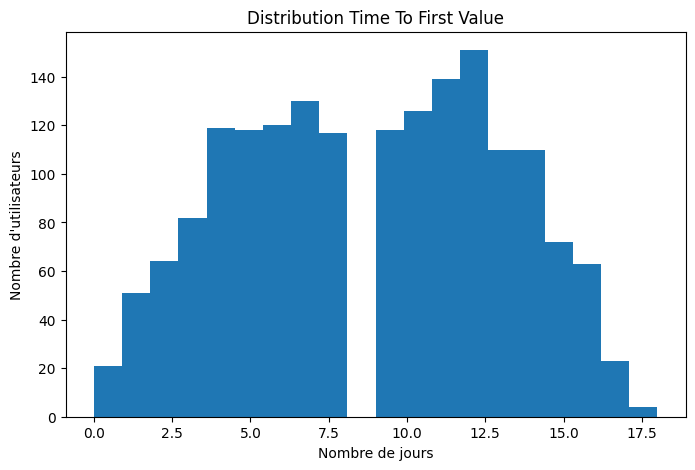

In [14]:
plt.figure(figsize=(8,5))
plt.hist(ttfv["days_to_value"], bins=20)
plt.title("Distribution Time To First Value")
plt.xlabel("Nombre de jours")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

In [15]:
ttfv = ttfv.merge(
    subscriptions[["user_id", "plan"]],
    on="user_id",
    how="left"
)

ttfv["is_paid"] = ttfv["plan"] != "free"

ttfv.groupby("is_paid")["days_to_value"].describe()

,count,mean,std,min,25%,50%,75%,max
is_paid,,,,,,,,
False,1229.0,8.672905,4.299696,0.0,5.0,9.0,12.0,18.0
True,509.0,9.001965,4.167978,0.0,6.0,9.0,12.0,18.0
